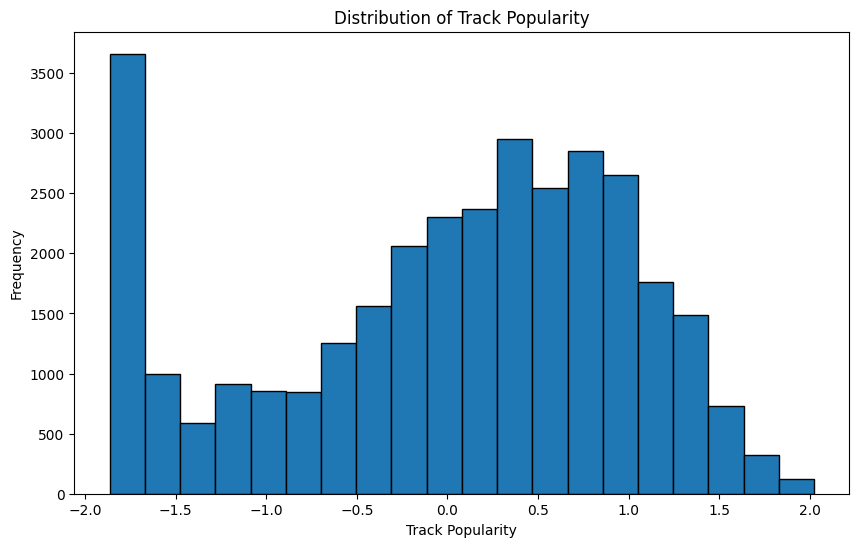

In [5]:
#Data Preparation

import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/yunjuha/Desktop/STAT 451 Final Project/spotify_songs.csv')

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df = df.dropna(subset=['track_album_release_date'])
df.set_index('track_album_release_date', inplace=True)
df = df.drop_duplicates()
df = df.dropna()
df['duration_min'] = df['duration_ms'] / 60000

#the numeric columns for transformation
numeric_columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']

#applying PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[numeric_columns] = pt.fit_transform(df[numeric_columns])

#dropping unnecessary columns
df_cleaned = df.drop(columns=['track_id', 'track_album_id', 'playlist_name', 'playlist_id', 'playlist_genre'])

#encoding categorical columns
categorical_columns = ['track_name', 'track_artist', 'track_album_name', 'playlist_subgenre']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

#histogram of Track Popularity
plt.figure(figsize=(10, 6))
df['track_popularity'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [2]:
#Data Visualization

In [4]:
len(df_cleaned)

32828

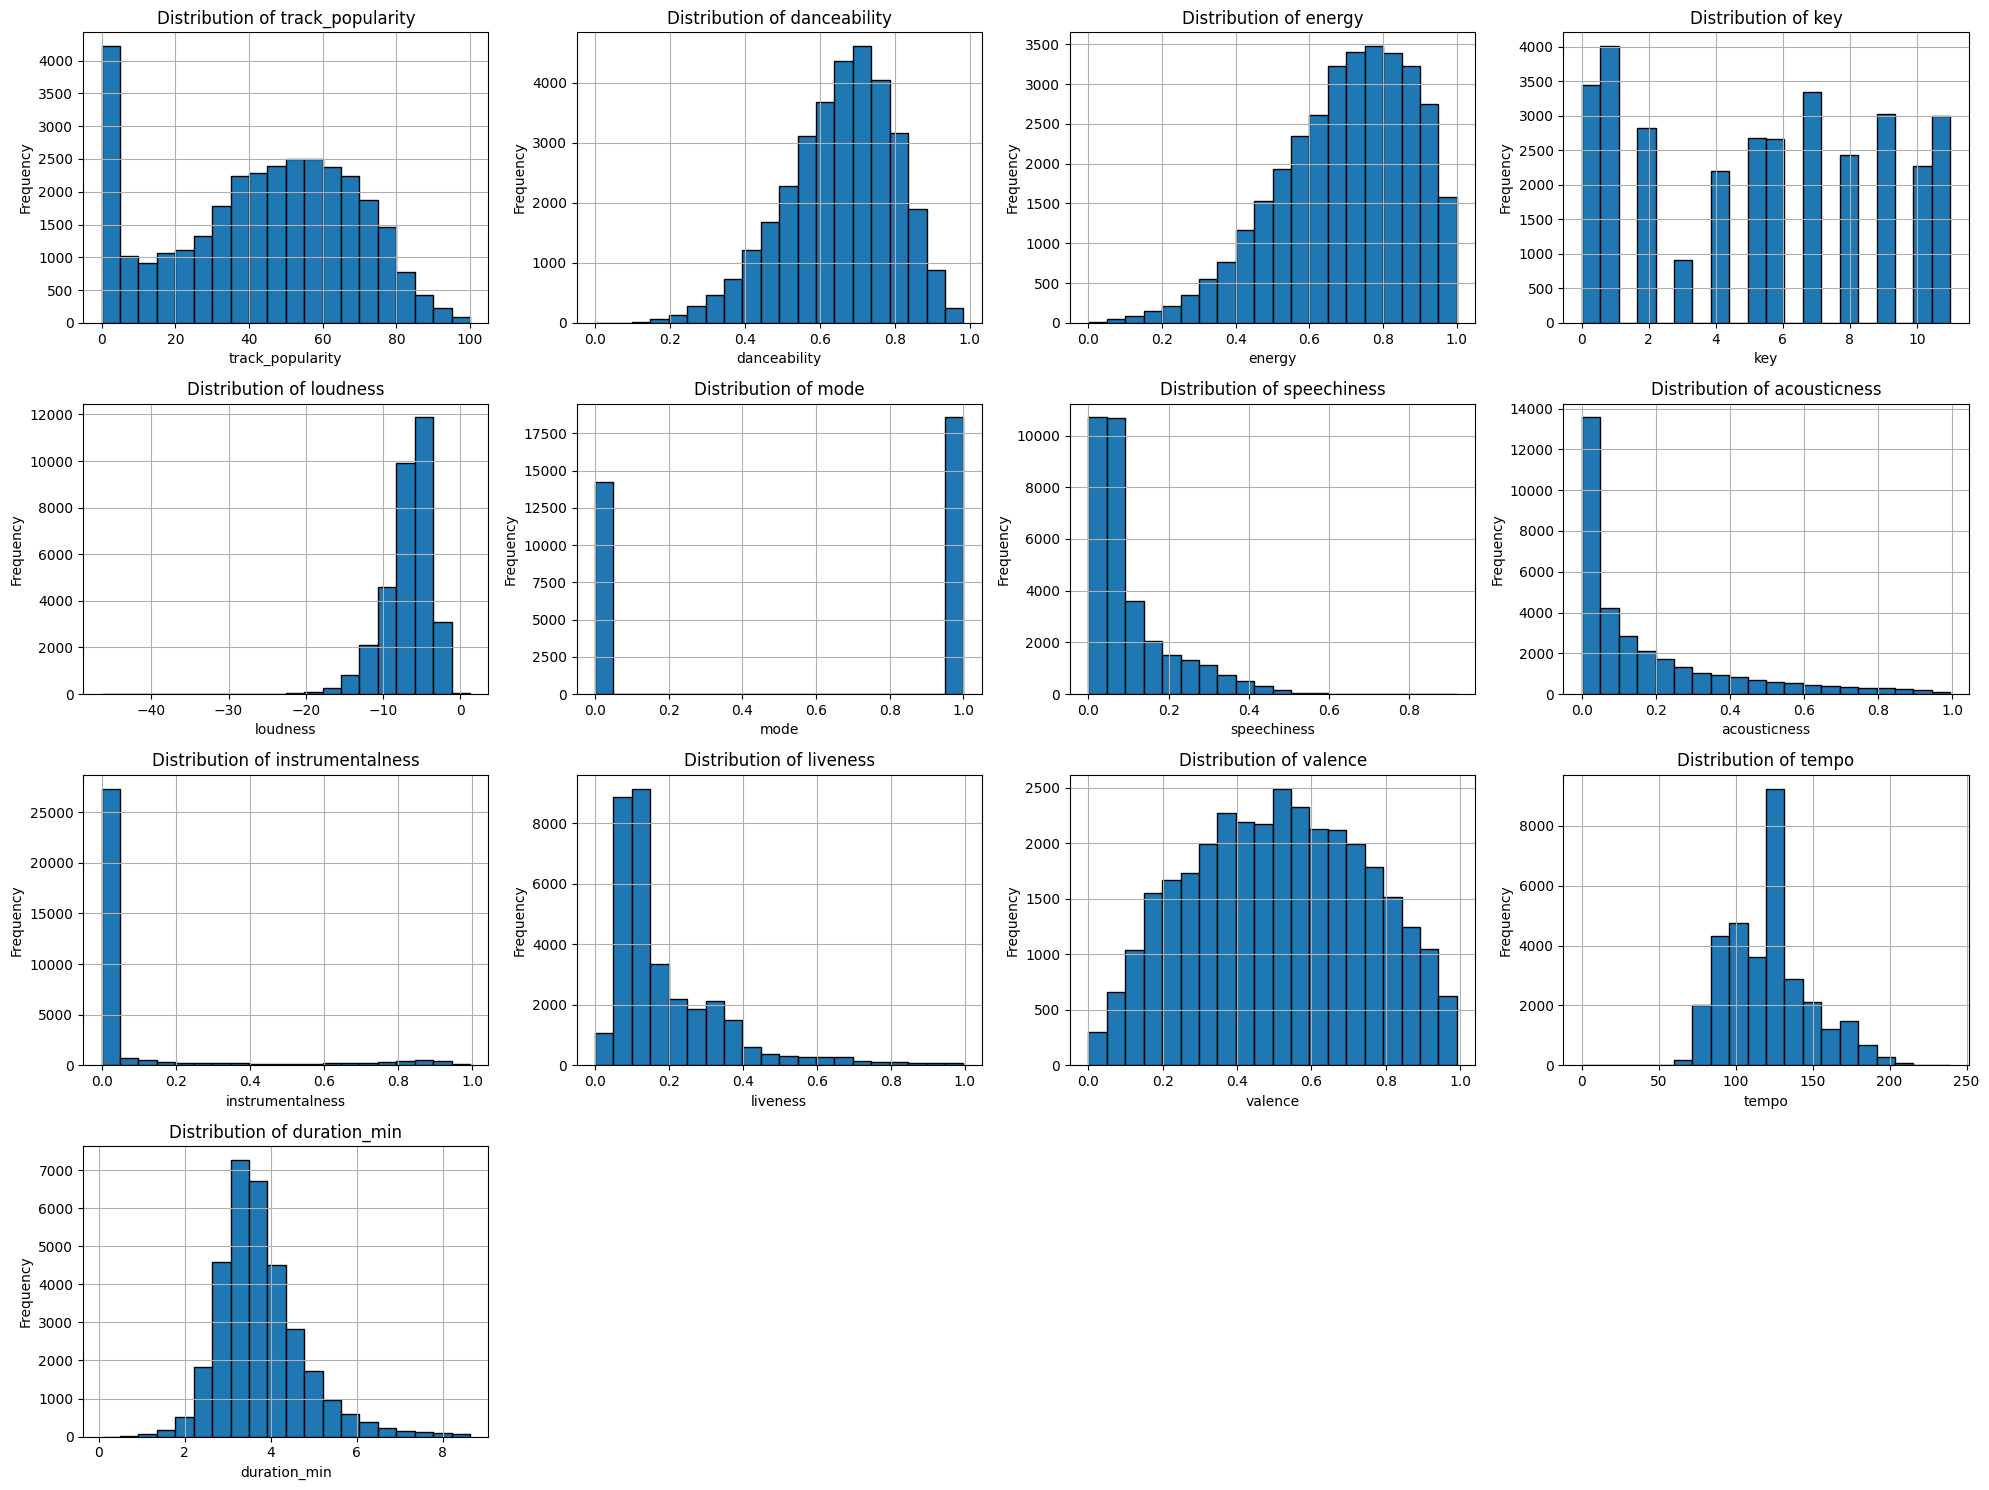

In [7]:
df_original = pd.read_csv('/Users/yunjuha/Desktop/STAT 451 Final Project/spotify_songs.csv')

df_original['track_album_release_date'] = pd.to_datetime(df_original['track_album_release_date'], errors='coerce')
df_original = df_original.dropna(subset=['track_album_release_date'])
df_original.set_index('track_album_release_date', inplace=True)
df_original = df_original.drop_duplicates()
df_original = df_original.dropna()
df_original['duration_min'] = df_original['duration_ms'] / 60000

#distribution of all numeric features prior to standardization and transformation
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    df_original[column].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


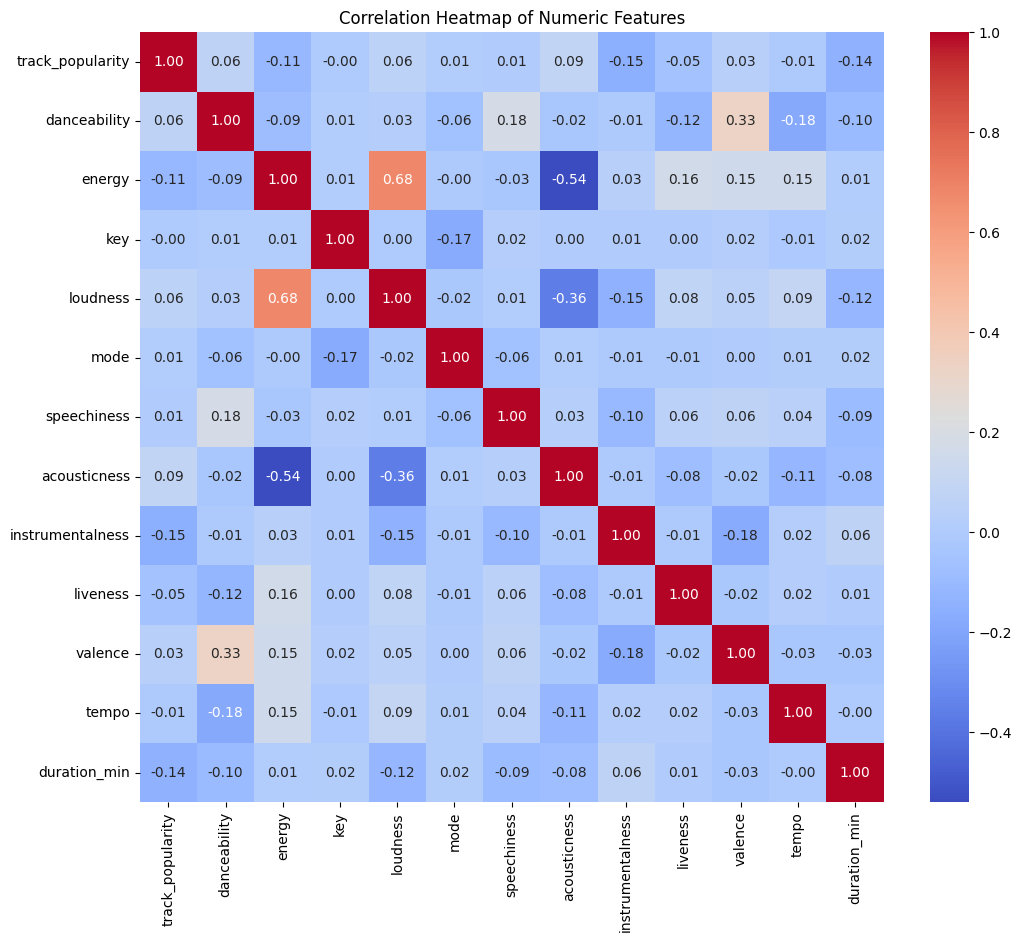

In [8]:
#correlation heatmap of numeric features
plt.figure(figsize=(12, 10))
correlation_matrix = df_original[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


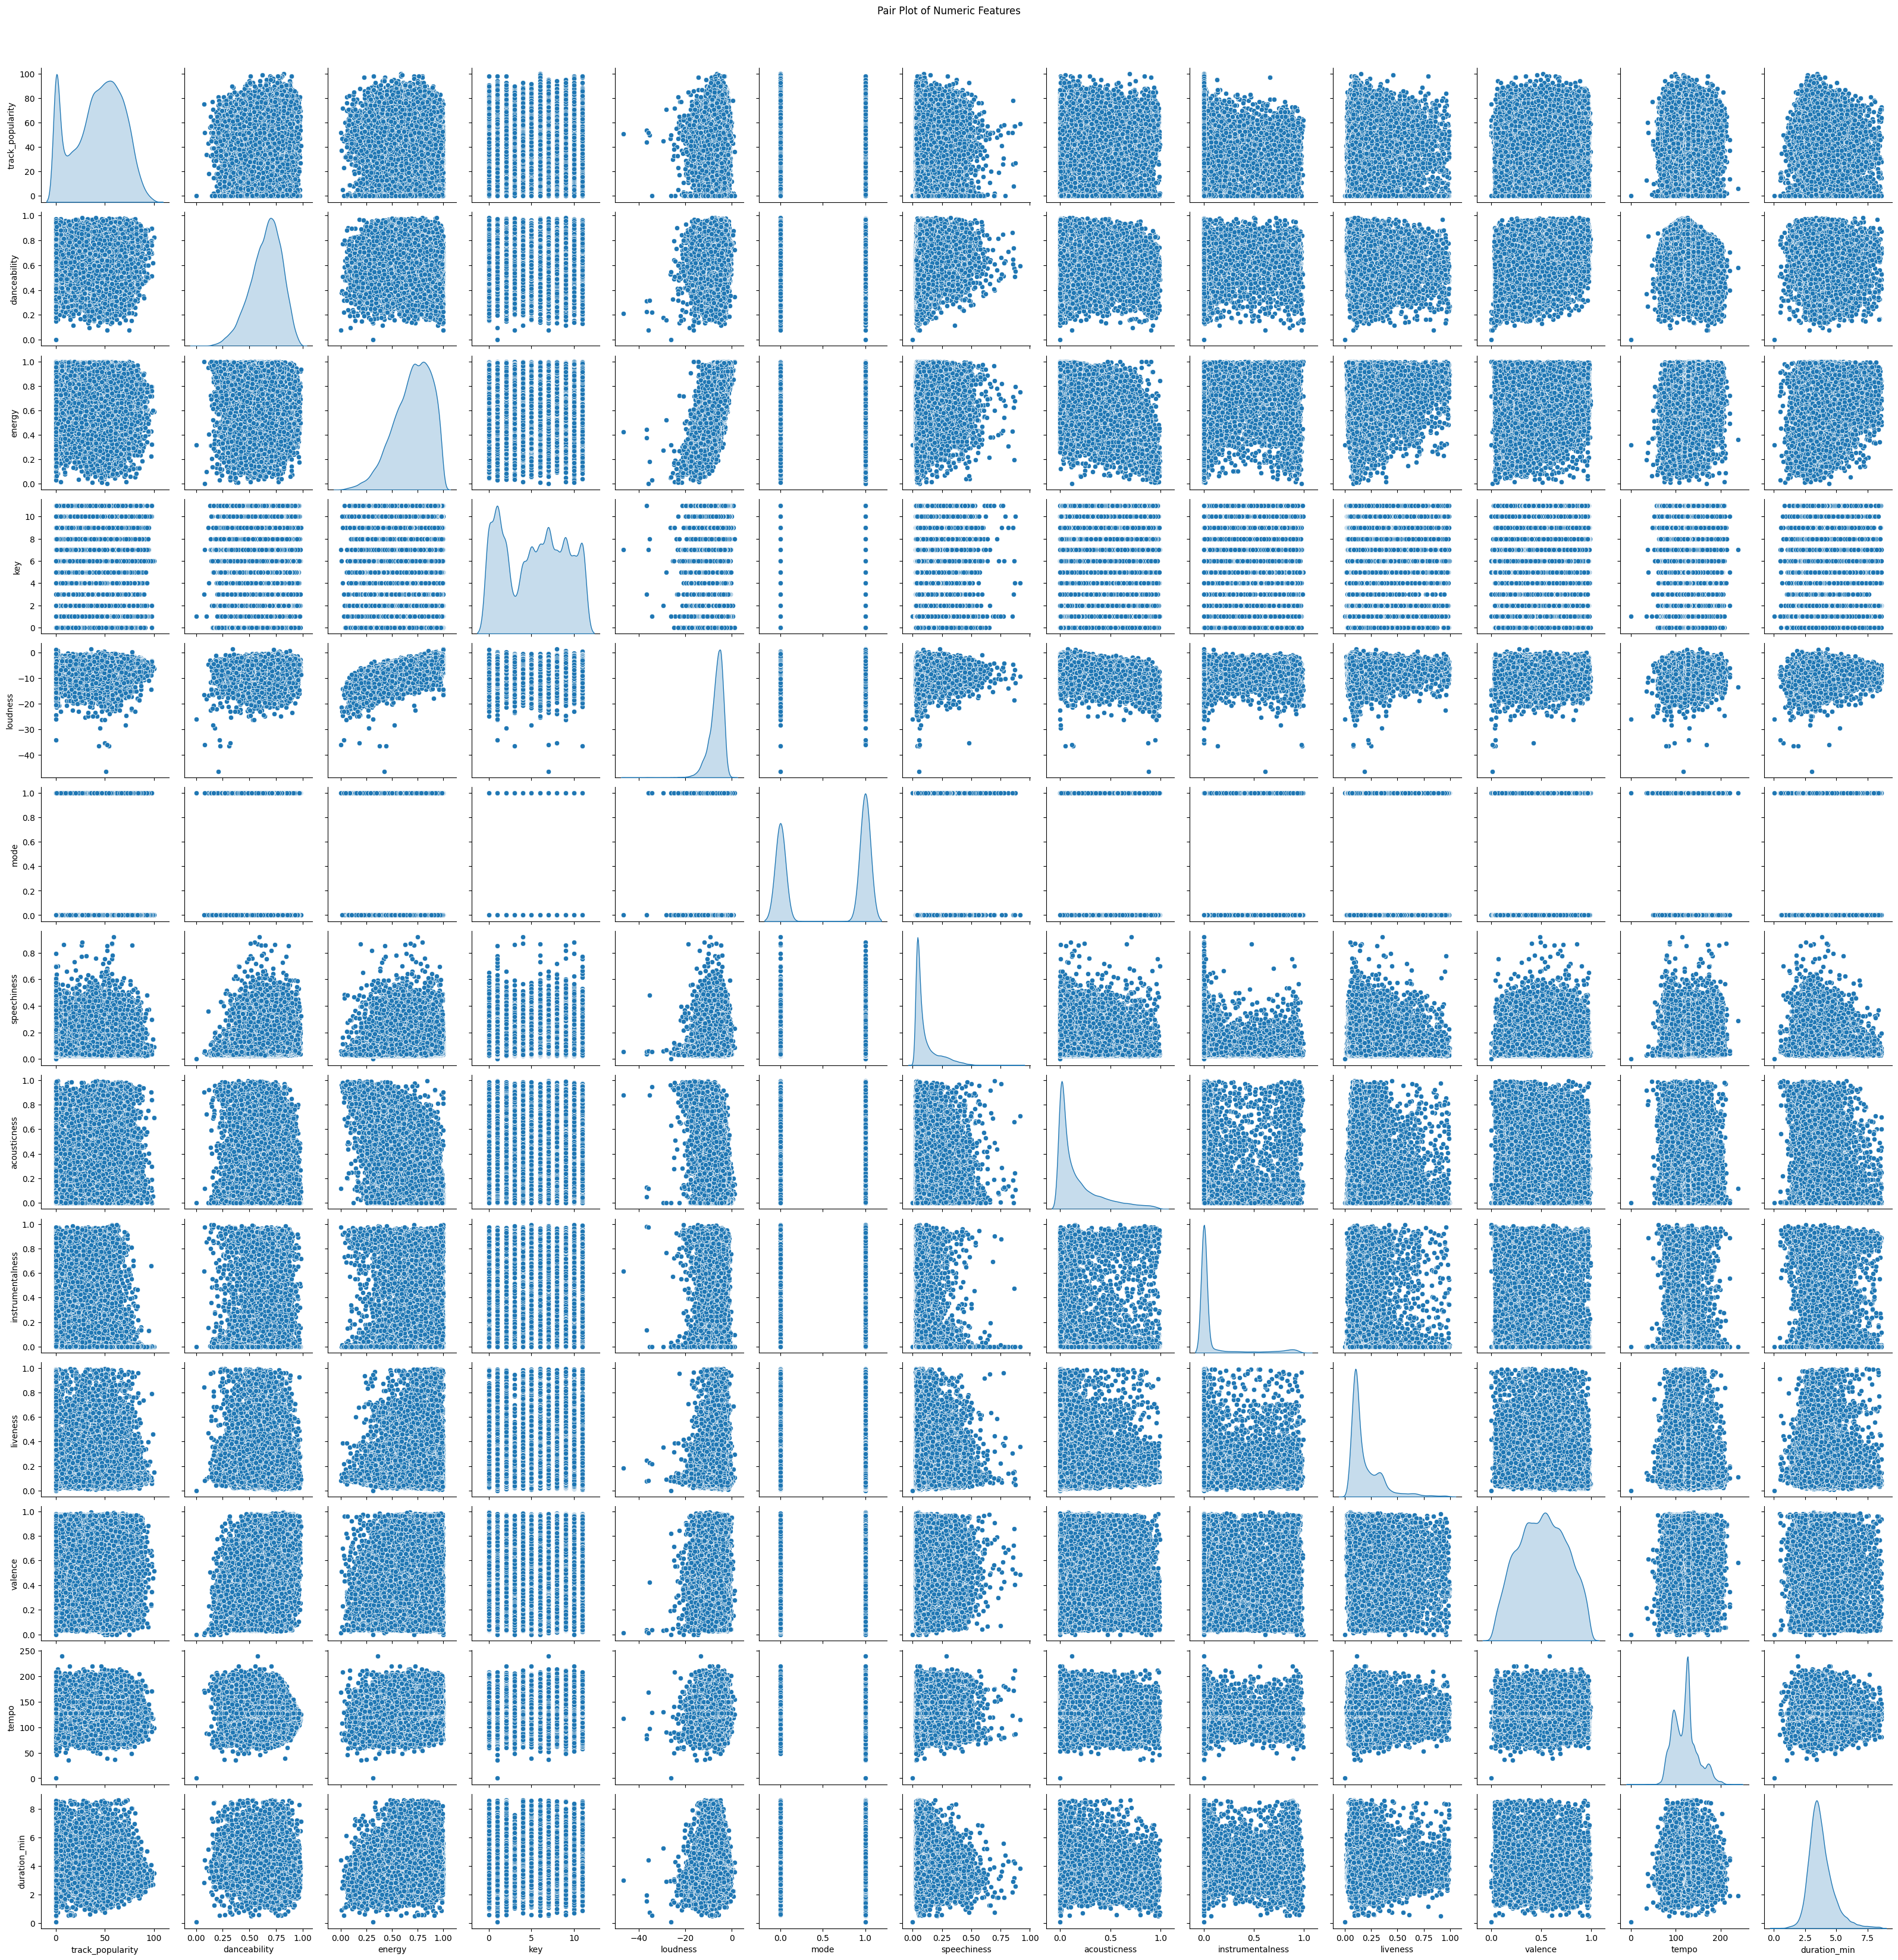

In [9]:
#pair plot of numeric features
sns.pairplot(df_original[numeric_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


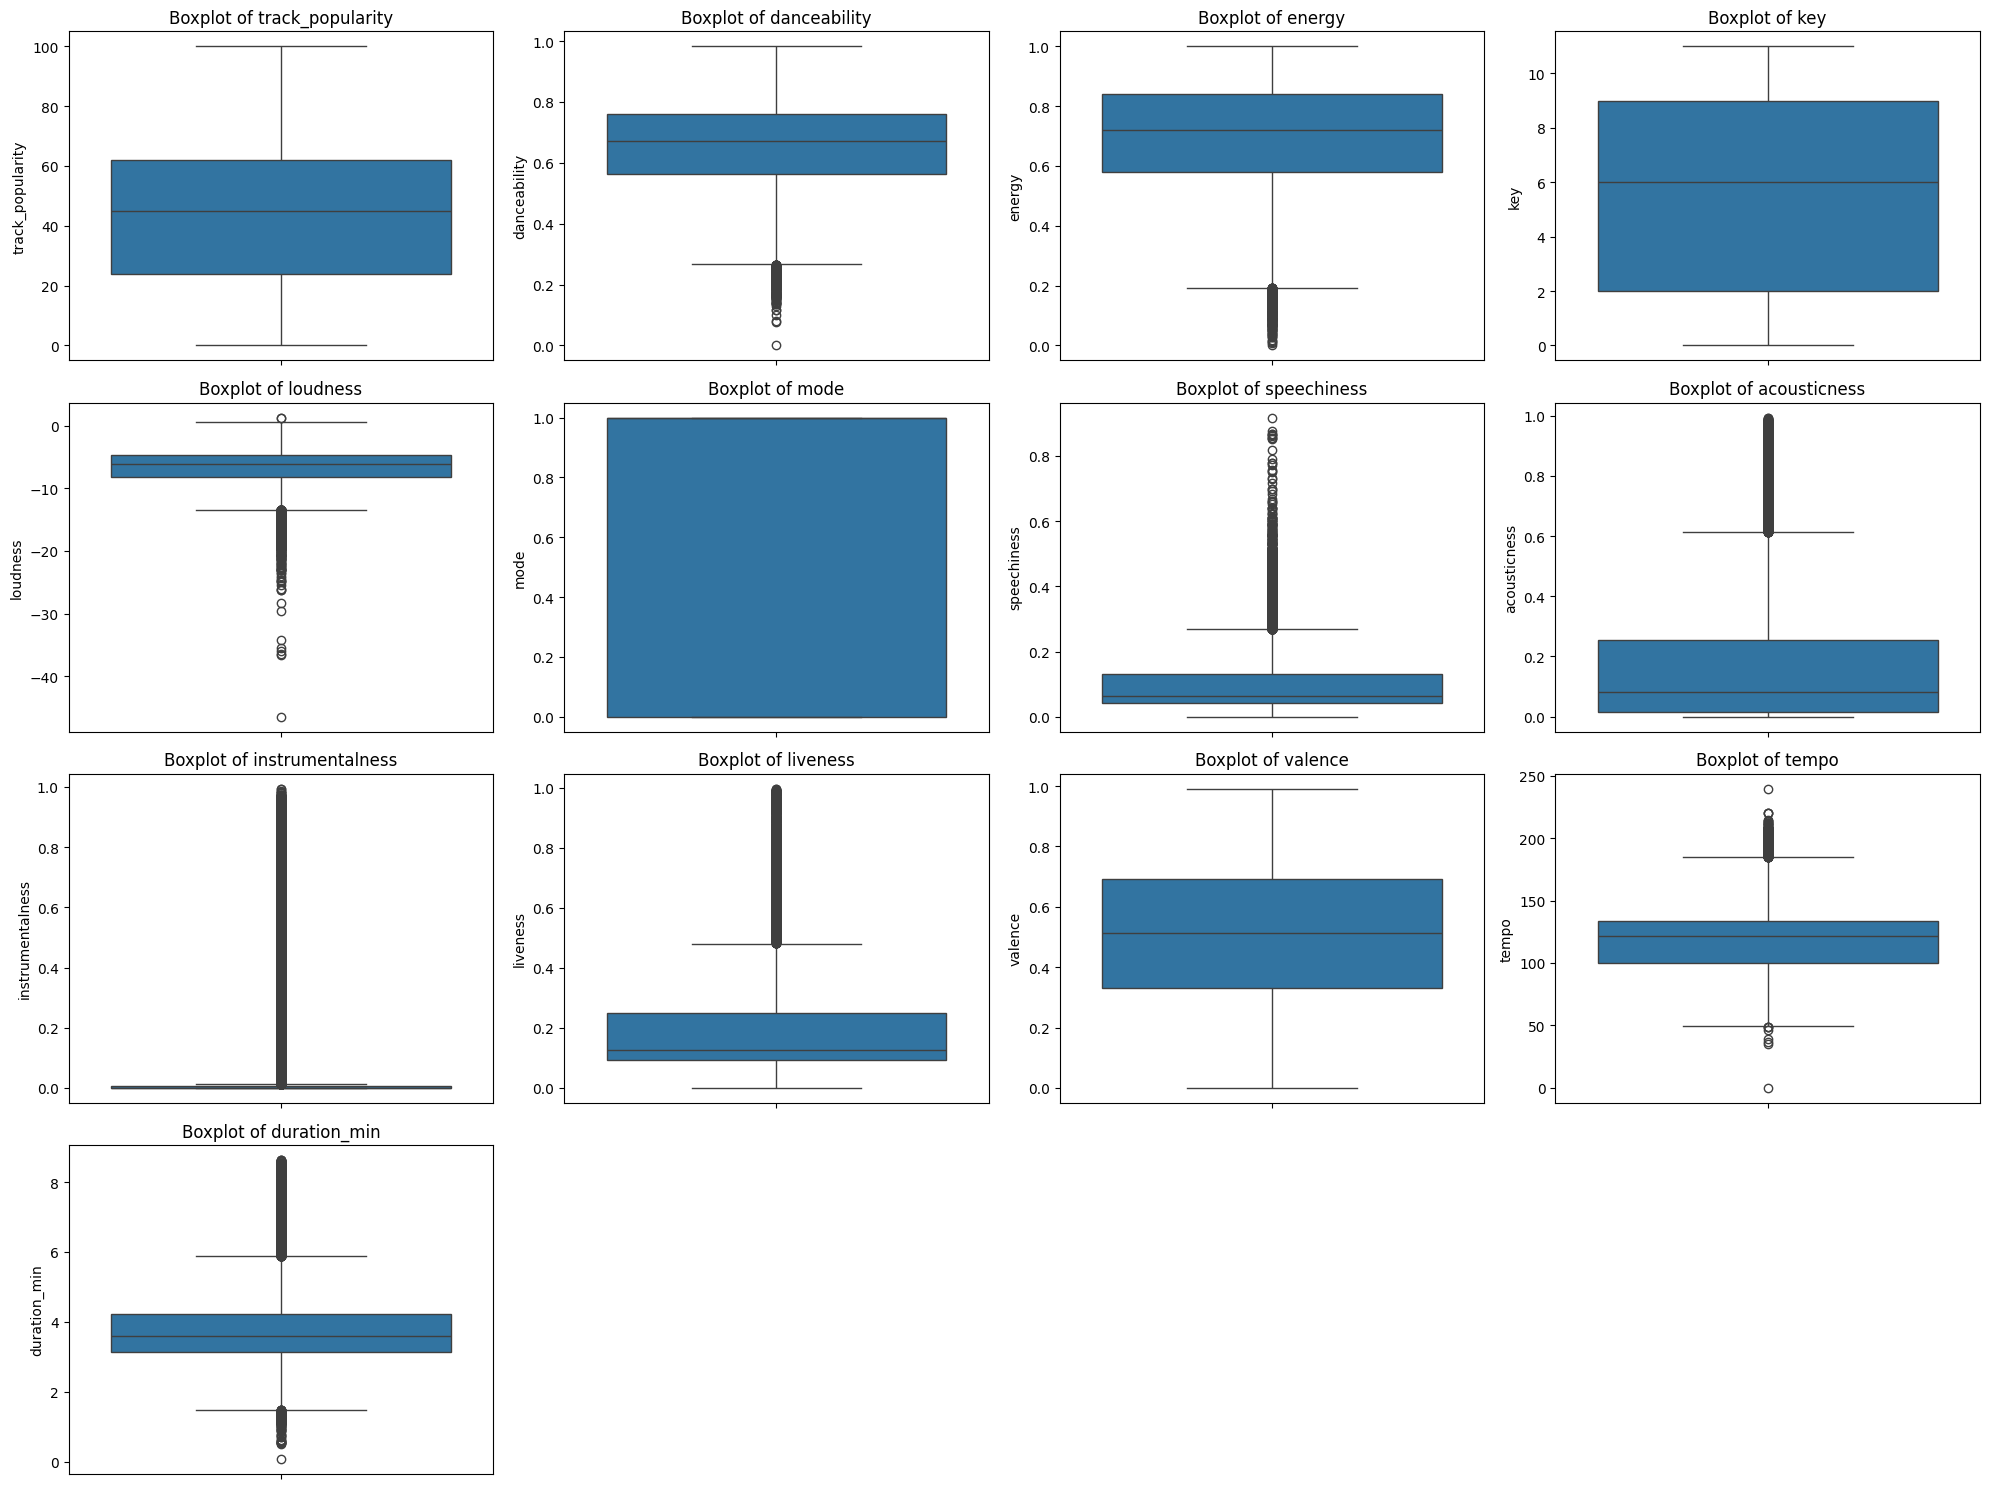

In [10]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_original[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


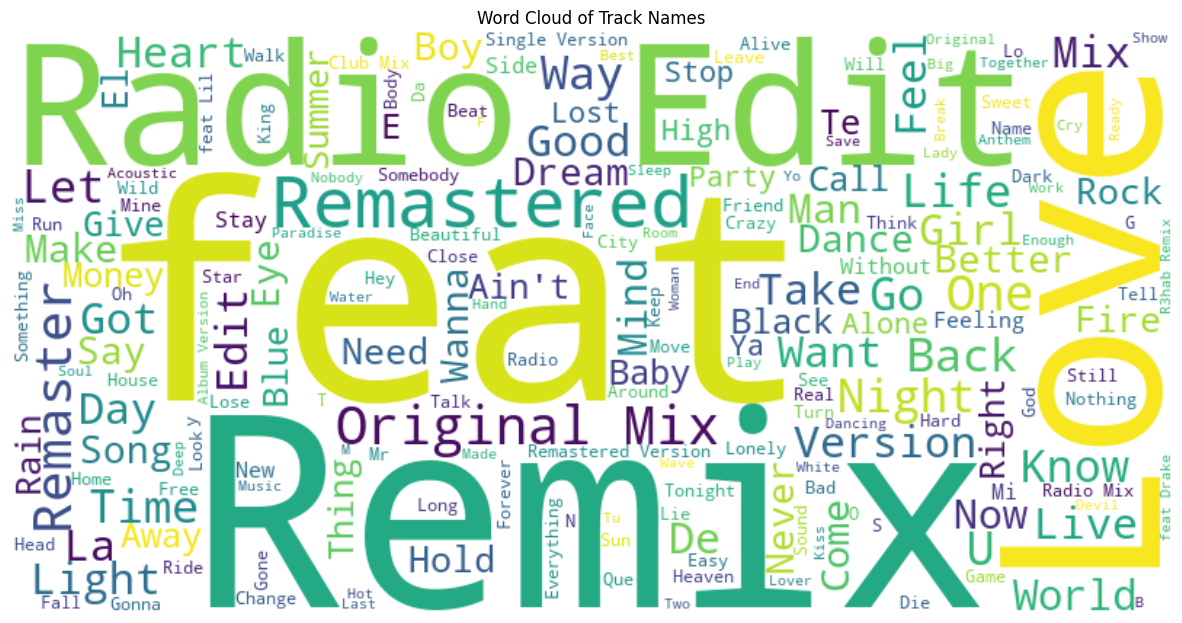

In [11]:
from wordcloud import WordCloud

text = ' '.join(df_original['track_name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names')
plt.show()


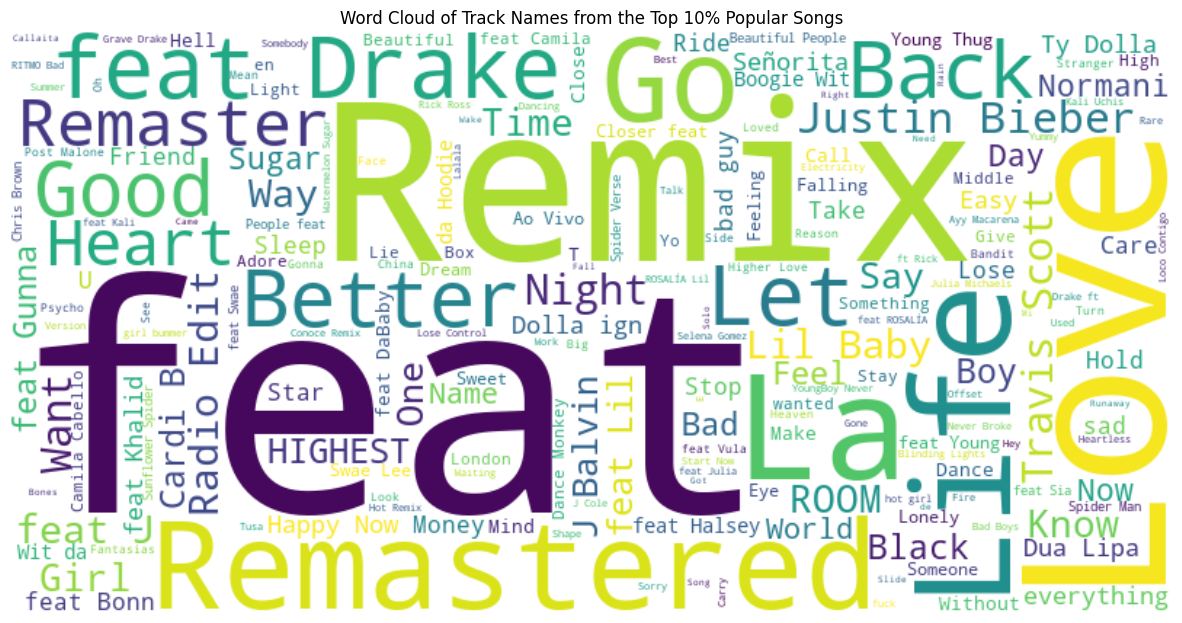

In [17]:
#filtering the top 10% popular songs
top_10_percent_threshold = df['track_popularity'].quantile(0.90)
top_10_percent_songs = df[df['track_popularity'] >= top_10_percent_threshold]

#generate the text for the word cloud from track names
text = ' '.join(top_10_percent_songs['track_name'].astype(str))

#creating and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names from the Top 10% Popular Songs')
plt.show()

In [ ]:
#the top 10 artists by track count
top_artists = spotify_data['track_artist_cleaned'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', edgecolor='black')
plt.title('Top 10 Artists by Track Count')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [12]:
# Descriptive statistics
descriptive_stats = df_encoded.describe()


In [13]:
descriptive_stats

track_popularity  danceability        energy           key  \
count      3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean       3.177400e-16 -5.036655e-16  2.101672e-16 -2.428774e-16   
std        1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min       -1.864096e+00 -3.103373e+00 -2.590766e+00 -1.650677e+00   
25%       -6.489899e-01 -7.084248e-01 -7.576632e-01 -8.784498e-01   
50%        1.710172e-01  3.076258e-02  5.925778e-03  2.650123e-01   
75%        7.769649e-01  7.134876e-01  7.790579e-01  9.816813e-01   
max        2.023460e+00  2.754842e+00  2.017876e+00  1.420910e+00   

           loudness          mode   speechiness  acousticness  \
count  3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean   8.657765e-17 -9.117708e-17 -3.387350e-17 -8.354743e-17   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -5.432163e+00 -1.141381e+00 -2.463083e+00 -1.178645e+00   
25%   -6.387434e-01 -1.141381e+00 -8.599014e-01 -9.643745e-01   
50%    2.834833e-02  8.761319e-01 -2.840291e-01 -2.177031e-01   
75%    6.610998e-01  8.761319e-01  8.501301e-01  8.944954e-01   
max    9.498108e+00  8.761319e-01  1.934803e+00  1.867090e+00   

       instrumentalness      liveness  ...  playlist_subgenre_new jack swing  \
count      3.282800e+04  3.282800e+04  ...                      32828.000000   
mean      -1.536753e-17 -5.551250e-16  ...                          0.034513   
std        1.000015e+00  1.000015e+00  ...                          0.182546   
min       -5.041295e-01 -2.864510e+00  ...                          0.000000   
25%       -5.041295e-01 -7.464994e-01  ...                          0.000000   
50%       -5.034879e-01 -2.429680e-01  ...                          0.000000   
75%       -3.182947e-01  8.728997e-01  ...                          0.000000   
max        2.393783e+00  2.064994e+00  ...                          1.000000   

       playlist_subgenre_permanent wave  playlist_subgenre_pop edm  \
count                      32828.000000               32828.000000   
mean                           0.033660                   0.046211   
std                            0.180356                   0.209944   
min                            0.000000                   0.000000   
25%                            0.000000                   0.000000   
50%                            0.000000                   0.000000   
75%                            0.000000                   0.000000   
max                            1.000000                   1.000000   

       playlist_subgenre_post-teen pop  \
count                     32828.000000   
mean                          0.034391   
std                           0.182235   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       playlist_subgenre_progressive electro house  \
count                                 32828.000000   
mean                                      0.055105   
std                                       0.228189   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       playlist_subgenre_reggaeton  playlist_subgenre_southern hip hop  \
count                 32828.000000                        32828.000000   
mean                      0.028878                            0.050993   
std                       0.167466                            0.219987   
min                       0.000000                            0.000000   
25%                       0.000000                            0.000000   
50%                       0.000000                            0.000000   
75%                       0.000000                            0

In [16]:
#calculating the descriptive statistics for only the numerical features
numeric_descriptive_stats = df[numeric_columns].describe()

print(numeric_descriptive_stats)


       track_popularity  danceability        energy           key  \
count      3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean       3.177400e-16 -5.036655e-16  2.101672e-16 -2.428774e-16   
std        1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min       -1.864096e+00 -3.103373e+00 -2.590766e+00 -1.650677e+00   
25%       -6.489899e-01 -7.084248e-01 -7.576632e-01 -8.784498e-01   
50%        1.710172e-01  3.076258e-02  5.925778e-03  2.650123e-01   
75%        7.769649e-01  7.134876e-01  7.790579e-01  9.816813e-01   
max        2.023460e+00  2.754842e+00  2.017876e+00  1.420910e+00   

           loudness          mode   speechiness  acousticness  \
count  3.282800e+04  3.282800e+04  3.282800e+04  3.282800e+04   
mean   8.657765e-17 -9.117708e-17 -3.387350e-17 -8.354743e-17   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -5.432163e+00 -1.141381e+00 -2.463083e+00 -1.178645e+00   
25%   -6.387434e-01 -1.141381e+00 -8.599014e-01 -9.64

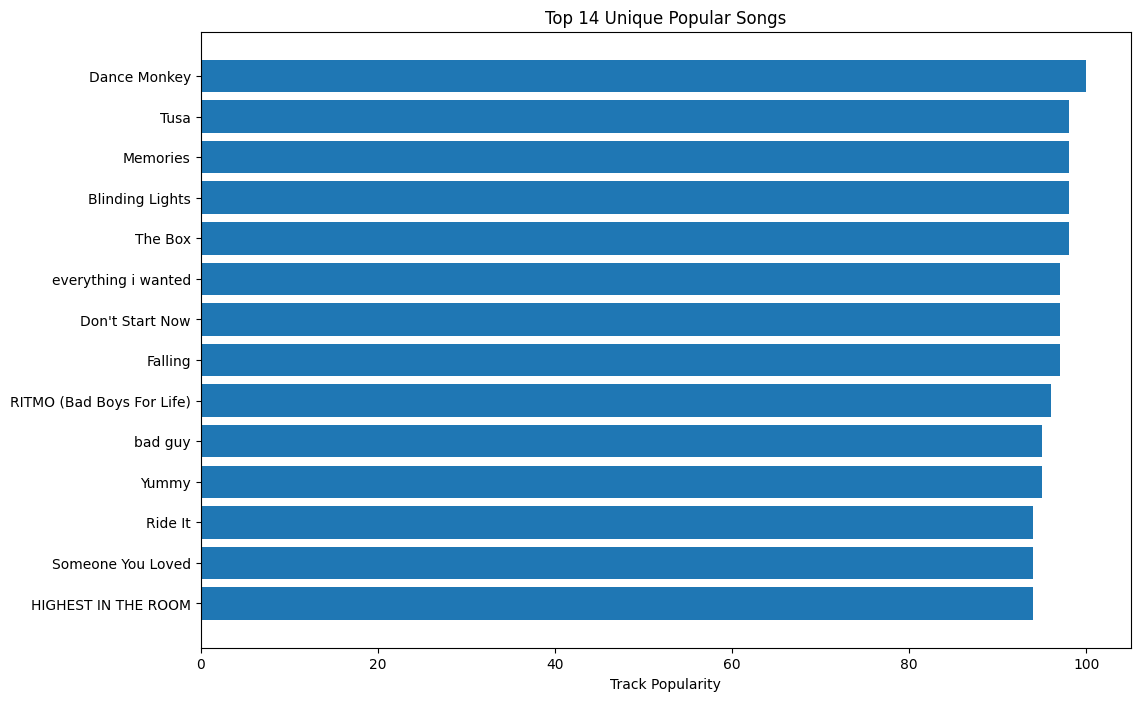

In [29]:
#dance monkey keeps getting filtered out...so fixing this
is_dance_monkey_present = df_original[df_original['track_name'].str.contains("Dance Monkey")]

#the top 10 unique popular songs
unique_tracks = df_original.drop_duplicates(subset=['track_name'])
top_20_unique_popular_songs = unique_tracks.nlargest(15, 'track_popularity')

if 'Dance Monkey' not in top_20_unique_popular_songs['track_name'].values:
    dance_monkey_track = df_original[df_original['track_name'] == 'Dance Monkey']
    top_20_unique_popular_songs = pd.concat([top_20_unique_popular_songs, dance_monkey_track]).nlargest(15, 'track_popularity')

#plotting the top 20 unique popular songs
plt.figure(figsize=(12, 8))
plt.barh(top_20_unique_popular_songs['track_name'], top_20_unique_popular_songs['track_popularity'])
plt.xlabel('Track Popularity')
plt.title('Top 14 Unique Popular Songs')
plt.gca().invert_yaxis()  #display the highest popularity at the top
plt.show()

In [30]:

#filtering the top 10% popular songs
top_10_percent_threshold = df['track_popularity'].quantile(0.90)
top_10_percent_songs = df[df['track_popularity'] >= top_10_percent_threshold]

#calculating descriptive statistics for the numerical features of the top 10% popular songs
top_10_percent_stats = top_10_percent_songs[numeric_columns].describe().round(2)

print(top_10_percent_stats)


       track_popularity  danceability   energy      key  loudness     mode  \
count           3320.00       3320.00  3320.00  3320.00   3320.00  3320.00   
mean               1.40          0.18    -0.23     0.00      0.21    -0.00   
std                0.19          1.00     0.86     1.01      0.88     1.00   
min                1.18         -2.90    -2.49    -1.65     -3.37    -1.14   
25%                1.25         -0.53    -0.87    -0.88     -0.31    -1.14   
50%                1.35          0.25    -0.24     0.27      0.21     0.88   
75%                1.51          0.89     0.41     0.98      0.81     0.88   
max                2.02          2.66     2.02     1.42      5.70     0.88   

       speechiness  acousticness  instrumentalness  liveness  valence  \
count      3320.00       3320.00           3320.00   3320.00  3320.00   
mean          0.05          0.19             -0.37     -0.08     0.07   
std           1.00          0.95              0.52      0.91     0.95   
min  